In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset = pd.read_excel("Adidas Dataset.xlsx")
dataset = dataset.drop(['Invoice Date', 'Retailer ID'], axis = 1)
dataset.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [6]:
encoder = LabelEncoder()
categorical_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']
for column in categorical_columns:
    dataset[column] = encoder.fit_transform(dataset[column])
print("Encoded Data: ")
dataset.head()

Encoded Data: 


,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,1,31,35,2,50.0,1200,600000.0,300000.0,0.50,0
1,1,1,31,35,1,50.0,1000,500000.0,150000.0,0.30,0
2,1,1,31,35,5,40.0,1000,400000.0,140000.0,0.35,0
3,1,1,31,35,4,45.0,850,382500.0,133875.0,0.35,0
4,1,1,31,35,0,60.0,900,540000.0,162000.0,0.30,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [8]:
x = dataset.drop('Sales Method', axis = 1)
y = dataset['Sales Method']
x
#y

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,1,1,31,35,2,50.0,1200,600000.0,300000.00,0.50
1,1,1,31,35,1,50.0,1000,500000.0,150000.00,0.30
2,1,1,31,35,5,40.0,1000,400000.0,140000.00,0.35
3,1,1,31,35,4,45.0,850,382500.0,133875.00,0.35
4,1,1,31,35,0,60.0,900,540000.0,162000.00,0.30
...,...,...,...,...,...,...,...,...,...,...
9643,1,1,28,30,0,50.0,64,3200.0,896.00,0.28
9644,1,1,28,30,3,41.0,105,4305.0,1377.60,0.32
9645,1,1,28,30,2,41.0,184,7544.0,2791.28,0.37
9646,1,1,28,30,1,42.0,70,2940.0,1234.80,0.42


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9100331674958541


In [10]:
col_1 = input("Enter the Retailer: ")
col_2 = input("Enter the Region: ")
col_3 = input("Enter the State: ")
col_4 = input("Enter the City: ")
col_5 = input("Enter the Product: ")
col_6 = float(input("Enter the Price per unit: "))
col_7 = int(input("Enter the Units sold: "))
col_8 = int(input("Enter the Total Sales: "))
col_9 = int(input("Enter the Operating profit: "))
col_10 = int(input("Enter the Operating margin: "))

user_input = [[col_1, col_2, col_3, col_4, col_5, col_6, col_7, col_8, col_9, col_10]]
result = model.predict(user_input)
sales_method = encoder.inverse_transform([result[0]])
print("Predicted Sales Method:", sales_method[0])

Enter the Retailer:  0
Enter the Region:  0
Enter the State:  0
Enter the City:  0
Enter the Product:  2
Enter the Price per unit:  40
Enter the Units sold:  950
Enter the Total Sales:  380000
Enter the Operating profit:  133000
Enter the Operating margin:  35


Predicted Sales Method: Outlet


In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot

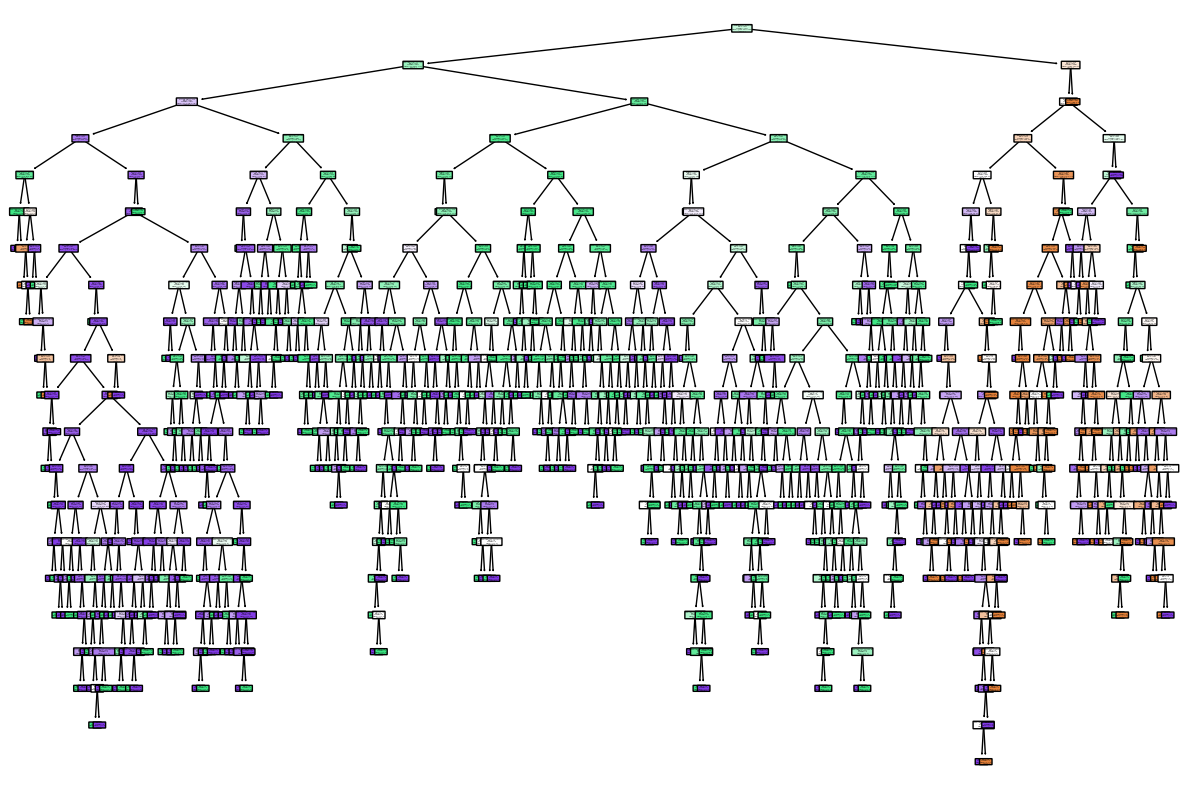

In [12]:
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=x.columns,        
          class_names=model.classes_.astype(str),
          filled=True,
          rounded=True)
plt.tight_layout()
plt.show()